<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importar-Librerías" data-toc-modified-id="Importar-Librerías-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importar Librerías</a></span></li><li><span><a href="#Preparar-los-datos" data-toc-modified-id="Preparar-los-datos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preparar los datos</a></span><ul class="toc-item"><li><span><a href="#Conjunto-de-datos" data-toc-modified-id="Conjunto-de-datos-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Conjunto de datos</a></span></li><li><span><a href="#Target-del-modelo" data-toc-modified-id="Target-del-modelo-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><em>Target</em> del modelo</a></span></li><li><span><a href="#Features-del-modelo" data-toc-modified-id="Features-del-modelo-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><em>Features</em> del modelo</a></span></li><li><span><a href="#TRAIN-TEST-SPLIT" data-toc-modified-id="TRAIN-TEST-SPLIT-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>TRAIN TEST SPLIT</a></span></li></ul></li><li><span><a href="#Regresión-Logística" data-toc-modified-id="Regresión-Logística-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Regresión Logística</a></span><ul class="toc-item"><li><span><a href="#Entrenamiento-del-modelo" data-toc-modified-id="Entrenamiento-del-modelo-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Entrenamiento del modelo</a></span></li><li><span><a href="#Evaluación-del-modelo" data-toc-modified-id="Evaluación-del-modelo-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Evaluación del modelo</a></span></li><li><span><a href="#Validación-cruzada" data-toc-modified-id="Validación-cruzada-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Validación cruzada</a></span></li><li><span><a href="#Funciones-de-evaluación" data-toc-modified-id="Funciones-de-evaluación-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Funciones de evaluación</a></span></li></ul></li><li><span><a href="#K-Nearest-Neighbors" data-toc-modified-id="K-Nearest-Neighbors-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>K-Nearest Neighbors</a></span></li><li><span><a href="#Support-Vector-Machine" data-toc-modified-id="Support-Vector-Machine-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Support Vector Machine</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusiones</a></span></li></ul></div>

El **OBJETIVO** de este notebook es probar distintos **modelos de clasificación** para poder elegir aquel que mejor se ajuste a nuestro proyecto y establecer un punto de partida sobre el que mejorar sus resultados.

## Importar Librerías

In [5]:
# Tratamiento de datos
import pandas as pd
import numpy as np
import os

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocesado y modelado
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


## Preparar los datos

### Conjunto de datos

Como ya se adelantó en el notebook anterior, mientras se terminan de hacer las consultas a la API de Google Analytics, empiezo a trabajar en un *baseline* con los **datos de 2020 y enero de 2021** para las dimensiones y métricas númericas disponibles.

In [6]:
data_root="../data/"

datafile_2020=os.path.join(data_root,'df_pDepth_Scount_daysSLS_srceMed_2020.csv')
datafile_jan21=os.path.join(data_root,'df_pDepth_Scount_daysSLS_srceMed_jan21.csv')

df_pDepth_Scount_daysSLS_srceMed_2020=pd.read_csv(datafile_2020)
print(df_pDepth_Scount_daysSLS_srceMed_2020.shape)
df_pDepth_Scount_daysSLS_srceMed_jan21=pd.read_csv(datafile_jan21)
print(df_pDepth_Scount_daysSLS_srceMed_jan21.shape)

(2885547, 13)
(983598, 12)


Veamos porque el número de columnas no coincide:

In [7]:
df_pDepth_Scount_daysSLS_srceMed_2020.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ga:productSKU', 'ga:pagePath',
       'ga:dateHourMinute', 'ga:pageDepth', 'ga:sessionCount',
       'ga:daysSinceLastSession', 'ga:sourceMedium', 'ga:productListViews',
       'ga:productListClicks', 'ga:productDetailViews',
       'ga:productAddsToCart'],
      dtype='object')

In [8]:
df_pDepth_Scount_daysSLS_srceMed_jan21.columns

Index(['Unnamed: 0', 'ga:productSKU', 'ga:pagePath', 'ga:dateHourMinute',
       'ga:pageDepth', 'ga:sessionCount', 'ga:daysSinceLastSession',
       'ga:sourceMedium', 'ga:productListViews', 'ga:productListClicks',
       'ga:productDetailViews', 'ga:productAddsToCart'],
      dtype='object')

Al procesar los *dataframes* originales, Pandas ha creado las columnas *Unnamed*:

In [9]:
df_pDepth_Scount_daysSLS_srceMed_2020.head()

,Unnamed: 0,Unnamed: 0.1,ga:productSKU,ga:pagePath,ga:dateHourMinute,ga:pageDepth,ga:sessionCount,ga:daysSinceLastSession,ga:sourceMedium,ga:productListViews,ga:productListClicks,ga:productDetailViews,ga:productAddsToCart
0,0,0,1000,/parafarmacia/es/1000-heliocare-360-pediatrics...,202001141125,12,407,0,google / organic,0,1,1,0
1,1,1,1000,/parafarmacia/es/1000-heliocare-360-pediatrics...,202001141345,5,3,0,(direct) / (none),0,0,1,0
2,2,2,1001,/parafarmacia/es/1001-heliocare-caps-60-caps.html,202001080932,6,3,19,google / organic,0,1,1,0
3,3,3,1002,/parafarmacia/es/147-champus,202001161511,14,1,0,google / cpc,2,0,0,0
4,4,4,1002,/parafarmacia/es/147-champus,202001162342,14,3,0,google / cpc,1,0,0,0


Procedemos a eliminarlas:

In [10]:
df_pDepth_Scount_daysSLS_srceMed_2020.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)
df_pDepth_Scount_daysSLS_srceMed_2020.shape

(2885547, 11)

In [11]:
df_pDepth_Scount_daysSLS_srceMed_jan21.drop('Unnamed: 0', axis=1, inplace=True)
df_pDepth_Scount_daysSLS_srceMed_jan21.shape

(983598, 11)

Una vez tenemos el mismo número de columnas en ambos *dataframes*, los unimos:

In [12]:
df_mvp = pd.concat([df_pDepth_Scount_daysSLS_srceMed_2020,df_pDepth_Scount_daysSLS_srceMed_jan21])
df_mvp.shape

(3869145, 11)

Veamos ahora el **formato** que ha asignado Pandas a las distintas variables:

In [13]:
df_mvp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3869145 entries, 0 to 983597
Data columns (total 11 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   ga:productSKU            object
 1   ga:pagePath              object
 2   ga:dateHourMinute        object
 3   ga:pageDepth             object
 4   ga:sessionCount          object
 5   ga:daysSinceLastSession  object
 6   ga:sourceMedium          object
 7   ga:productListViews      int64 
 8   ga:productListClicks     int64 
 9   ga:productDetailViews    int64 
 10  ga:productAddsToCart     int64 
dtypes: int64(4), object(7)
memory usage: 354.2+ MB


Como vemos, no está considerando *ga:pageDepth*, *ga:sessionCount* y *ga:daysSinceLastSession* como valores númericos. Cambiemos el formato:

In [14]:
df_mvp["ga:pageDepth"]=pd.to_numeric(df_mvp["ga:pageDepth"])
df_mvp["ga:sessionCount"]=pd.to_numeric(df_mvp["ga:sessionCount"])
df_mvp["ga:daysSinceLastSession"]=pd.to_numeric(df_mvp["ga:daysSinceLastSession"])

ValueError: Unable to parse string "(other)" at position 2885547

Al intentar convertir estas variables a formato numérico, Python indica que la observación número 2885547 cuenta con valores de texto y no puede realizar el cambio. Veamos con más detalle:

In [15]:
df_mvp.iloc[2885547]

ga:productSKU              (other)
ga:pagePath                (other)
ga:dateHourMinute          (other)
ga:pageDepth               (other)
ga:sessionCount            (other)
ga:daysSinceLastSession    (other)
ga:sourceMedium            (other)
ga:productListViews          53386
ga:productListClicks           215
ga:productDetailViews         3050
ga:productAddsToCart           265
Name: 0, dtype: object

Como no aporta nada a nuestro modelo, la eliminamos del conjunto de datos:

In [16]:
df_mvp.drop(df_mvp.index[2885547], inplace=True)

Ahora sí, ejecutamos el cambio de formato:

In [17]:
df_mvp["ga:pageDepth"]=pd.to_numeric(df_mvp["ga:pageDepth"])
df_mvp["ga:sessionCount"]=pd.to_numeric(df_mvp["ga:sessionCount"])
df_mvp["ga:daysSinceLastSession"]=pd.to_numeric(df_mvp["ga:daysSinceLastSession"])

In [18]:
df_mvp.dtypes

ga:productSKU              object
ga:pagePath                object
ga:dateHourMinute          object
ga:pageDepth                int64
ga:sessionCount             int64
ga:daysSinceLastSession     int64
ga:sourceMedium            object
ga:productListViews         int64
ga:productListClicks        int64
ga:productDetailViews       int64
ga:productAddsToCart        int64
dtype: object

In [19]:
data = df_mvp.select_dtypes('number')
data.columns

Index(['ga:pageDepth', 'ga:sessionCount', 'ga:daysSinceLastSession',
       'ga:productListViews', 'ga:productListClicks', 'ga:productDetailViews',
       'ga:productAddsToCart'],
      dtype='object')

### *Target* del modelo

El objetivo del proyecto es predecir si un usuario convertirá o no con respecto a un producto específico. Estamos ante un **problema de clasificación**, de modo que convertimos la variable dependiente *ga:productAddsToCart* en binaria:

In [20]:
data["ga:productAddsToCart"].value_counts()

0     3804874
1       63465
2         650
3          75
4          29
5          20
6          10
7           9
12          2
11          2
9           2
8           2
24          1
13          1
10          1
Name: ga:productAddsToCart, dtype: int64

In [21]:
data["ga:productAddsToCart_fast_transf"]=data["ga:productAddsToCart"].apply(lambda x: 1 if x>1 else x)

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
data["ga:productAddsToCart_fast_transf"].value_counts()

0    3804874
1      64269
Name: ga:productAddsToCart_fast_transf, dtype: int64

Una vez transformada, guardamos sus datos en la variable *'y'* para poder alimentar el modelo más adelante:

In [23]:
y = data['ga:productAddsToCart_fast_transf']

### *Features* del modelo

Guardamos en *'X'* las **variables independientes** de nuestro modelo inicial:

In [24]:
X = data[data.columns[0:-2]]
X.columns

Index(['ga:pageDepth', 'ga:sessionCount', 'ga:daysSinceLastSession',
       'ga:productListViews', 'ga:productListClicks', 'ga:productDetailViews'],
      dtype='object')

### TRAIN TEST SPLIT

Separamos los conjuntos de entrenamiento y de evaluación del modelo:

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)
X_train.shape, X_test.shape

#I have included random_state param in order to warranty replicability

((2901857, 6), (967286, 6))

## Regresión Logística

Empezaremos por probar un modelo de Regresión Logística.

### Entrenamiento del modelo

In [26]:
from sklearn.linear_model import LogisticRegression
clfl=LogisticRegression(random_state=42)
clfl.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [27]:
clfl.score(X_train,y_train)

0.9940669026764586

### Evaluación del modelo

In [28]:
predictions = clfl.predict(X_test)
probabilities = clfl.predict_proba(X_test)

In [29]:
probabilities

array([[9.99997711e-01, 2.28919196e-06],
       [9.98993053e-01, 1.00694674e-03],
       [9.98676519e-01, 1.32348113e-03],
       ...,
       [9.99829754e-01, 1.70245727e-04],
       [9.98297781e-01, 1.70221941e-03],
       [9.99162310e-01, 8.37689583e-04]])

ACCURACY: 0.9940482959538337
PRECISION: 0.9954404346138921
RECALL: 0.6424769895435477
F1 SCORE: 0.780927736976293
AUC: 0.9264392514992181


Text(0, 0.5, 'tpr')

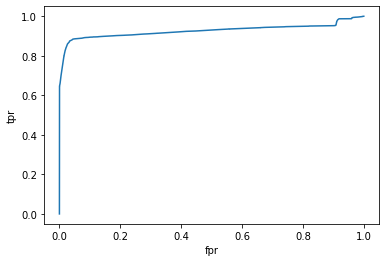

In [30]:
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, roc_curve, accuracy_score

print("ACCURACY: " + str(accuracy_score(y_test, predictions)))
print("PRECISION: " + str(precision_score(y_test, predictions)))
print("RECALL: " + str(recall_score(y_test, predictions)))
print("F1 SCORE: " + str(f1_score(y_test, predictions)))
print("AUC: " + str(roc_auc_score(y_test,probabilities[:, 1])))

tpr, fpr, thresolds = roc_curve(y_test, probabilities[:, 1])
plt.plot(tpr, fpr)
plt.xlabel('fpr')
plt.ylabel('tpr')

In [31]:
from sklearn.metrics import confusion_matrix

clfl_cm = confusion_matrix(y_test,predictions)
clfl_cm

array([[951268,     47],
       [  5710,  10261]])

<AxesSubplot:>

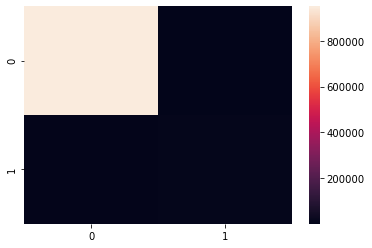

In [32]:
sns.heatmap(clfl_cm)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clfl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    951315
           1       1.00      0.64      0.78     15971

    accuracy                           0.99    967286
   macro avg       0.99      0.82      0.89    967286
weighted avg       0.99      0.99      0.99    967286



Esta primera Regresión Logística parece estar dando buenos resultados. No obstante, su principal punto débil son los **falsos negativos**, tal y como indica también la métrica *Recall*. De cara a la toma de decisiones, esto puede suponer costes de oportunidad elevados, por estar omitiendo del modelo algunos usuarios con potencial de convertir.

### Validación cruzada

Al hacer la validación cruzada, observamos un **resultado medio similar** para *Recall*. Ahora bien, en el detalle de las iteraciones, vemos como en dos de ellas esta métrica adopta valores muy elevados, en otras dos muy bajos y en una última un 66% de verdaderos positivos sobre el total de positivos reales:

In [22]:
from sklearn.model_selection import cross_val_score
crossval_scores=cross_val_score(clfl,X,y,scoring='recall')

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
crossval_scores

array([0.99844406, 0.99502101, 0.6578497 , 0.26810861, 0.30597479])

In [24]:
crossval_scores.mean()

0.6450796344890739

(array([2., 0., 0., 0., 0., 1., 0., 0., 0., 2.]),
 array([0.26810861, 0.34114216, 0.4141757 , 0.48720925, 0.56024279,
        0.63327634, 0.70630988, 0.77934343, 0.85237697, 0.92541052,
        0.99844406]),
 <BarContainer object of 10 artists>)

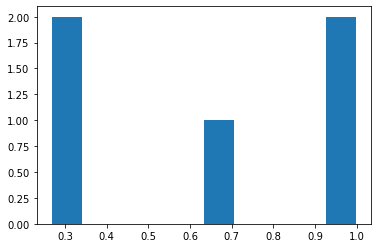

In [25]:
plt.hist(crossval_scores)

### Funciones de evaluación

Empaquetamos el código anterior para evaluar el resto de modelos de prueba:

In [36]:
def evaluate(classifier,features,target):
    X_train, X_test, y_train, y_test = train_test_split(features, target,random_state=42)
    classifier.fit(X_train,y_train)
    predictions = classifier.predict(X_test)
    probabilities = classifier.predict_proba(X_test)
    print("TRAINING SCORE: " + str(classifier.score(X_train,y_train)))
    print("ACCURACY: " + str(accuracy_score(y_test, predictions)))
    print("PRECISION: " + str(precision_score(y_test, predictions)))
    print("RECALL: " + str(recall_score(y_test, predictions)))
    print("F1 SCORE: " + str(f1_score(y_test, predictions)))
    print("AUC: " + str(roc_auc_score(y_test,probabilities[:, 1])))

    tpr, fpr, thresolds = roc_curve(y_test, probabilities[:, 1])
    plt.plot(tpr, fpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')

TRAINING SCORE0.9940669026764586
ACCURACY: 0.9940482959538337
PRECISION: 0.9954404346138921
RECALL: 0.6424769895435477
F1 SCORE: 0.780927736976293
AUC: 0.9264391652120458


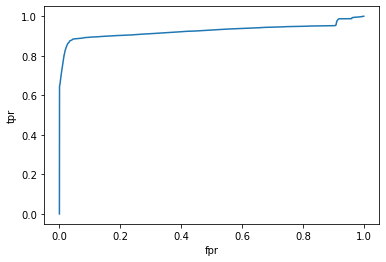

In [65]:
evaluate(clfl,X,y)

In [40]:
def validation(classifier,features,target,metric="recall",cv=5):
    crossval_scores=cross_val_score(classifier,features,target,scoring=metric)
    print("Score per iteration: " + str(crossval_scores))
    print("Mean: " + str(crossval_scores.mean()))
    plt.hist(crossval_scores) 

/home/dsc/TFM/kschool_masterDS_TFM/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score per iteration: [0.99844406 0.99502101 0.6578497  0.26810861 0.30597479]
Mean: 0.6450796344890739


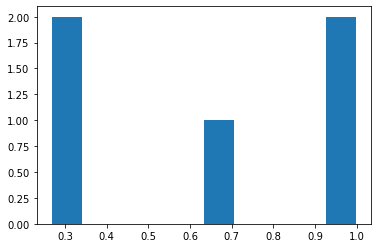

In [73]:
validation(clfl,X,y,"recall")

## K-Nearest Neighbors

Los resultados son peores que los de la Regresión Logística, además su coste computacional y tiempo de entrenamiento es mucho mayor. Cabe señalar que ante la incapacidad del algoritmo de devolver resultados, se limitó el número de vecinos para la prueba.

TRAINING SCORE: 0.993391473115319
ACCURACY: 0.992484125687749
PRECISION: 0.9560750602788552
RECALL: 0.5710350009392023
F1 SCORE: 0.7150137201097609
AUC: 0.8511616391987036


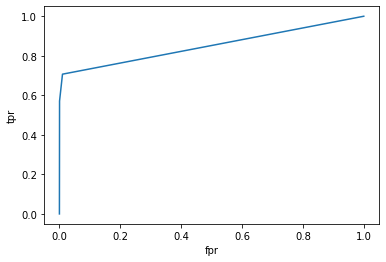

In [35]:
from sklearn.neighbors import KNeighborsClassifier
clfk=KNeighborsClassifier(n_neighbors=2)
evaluate(clfk,X,y)

In [36]:
print(classification_report(y_test,clfk.predict(X_test)))
clfk_cm = confusion_matrix(y_test,clfk.predict(X_test))
clfk_cm

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    951315
           1       0.96      0.57      0.72     15971

    accuracy                           0.99    967286
   macro avg       0.97      0.79      0.86    967286
weighted avg       0.99      0.99      0.99    967286



array([[950896,    419],
       [  6851,   9120]])

## Support Vector Machine

Dado el elevado coste computacional de este algoritmo, no fue posible entrenar, ni evaluar el modelo con el volumen de datos actual. Teniendo en cuenta que está previsto aumentar el conjunto de datos, se descarta directamente.

In [ ]:
from sklearn.svm import SVC
clfs=SVC(kernel="linear",C=10, random_state=42)
evaluate(clfs,X,y)

In [ ]:
print(classification_report(y_test,clfs.predict(X_test)))
clfs_cm = confusion_matrix(y_test,clfs.predict(X_test))
clfs_cm

## Decision Tree

Los resultados para *Recall* mejoraron ligeramente, aunque parece que a costa de *Precision* y el número de falsos positivos. *F1 Score* sigue siendo (ligeramente) más elevado en el caso de la Regresión Logística. En el siguiente apartado, evaluamos si un conjunto de árboles de decisión en paralelo (RANDOM FOREST) optimiza estos resultados.

In [34]:
from sklearn.tree import DecisionTreeClassifier

TRAINING SCORE: 0.9944142664507589
ACCURACY: 0.9939128654813572
PRECISION: 0.9681493174853747
RECALL: 0.6528082148894871
F1 SCORE: 0.7798055347793568
AUC: 0.951353502807178


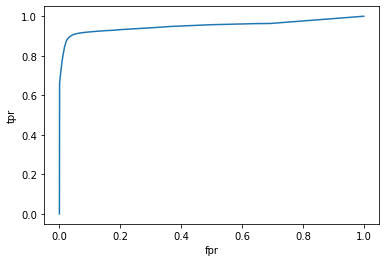

In [37]:
clfd=DecisionTreeClassifier(random_state=42)
evaluate(clfd,X,y)

In [38]:
print(classification_report(y_test,clfd.predict(X_test)))
clfd_cm = confusion_matrix(y_test,clfd.predict(X_test))
clfd_cm

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    951315
           1       0.97      0.65      0.78     15971

    accuracy                           0.99    967286
   macro avg       0.98      0.83      0.89    967286
weighted avg       0.99      0.99      0.99    967286



array([[950972,    343],
       [  5545,  10426]])

Score per iteration: [0.99844406 0.99642135 0.68468959 0.28250214 0.3105648 ]
Mean: 0.6545243893284515


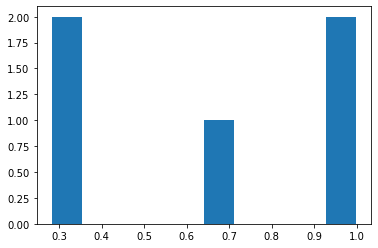

In [41]:
validation(clfd,X,y,"recall")

## Random Forest

En este caso, los valores son bastante similares con respecto a un único árbol de decisión, aunque observamos ligeras mejoras especialmente en F1-score y AUC.

TRAINING SCORE: 0.9944142664507589
ACCURACY: 0.9939655903217869
PRECISION: 0.9712611607142857
RECALL: 0.6538726441675536
F1 SCORE: 0.7815739250832615
AUC: 0.9605868642082936


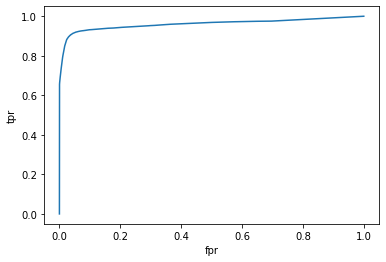

In [42]:
from sklearn.ensemble import RandomForestClassifier
clfr=RandomForestClassifier(random_state=42)
evaluate(clfr,X,y)

In [33]:
print(classification_report(y_test,clfr.predict(X_test)))
clfr_cm = confusion_matrix(y_test,clfr.predict(X_test))
clfr_cm

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    951315
           1       0.97      0.65      0.78     15971

    accuracy                           0.99    967286
   macro avg       0.98      0.83      0.89    967286
weighted avg       0.99      0.99      0.99    967286



array([[951002,    313],
       [  5530,  10441]])

## Conclusiones

A la vista de los resultados, se opta por un modelo de Regresión Logística. En principio, no se observan diferencias significativas en términos de rendimiento con respecto al resto de modelos. En cambio, con la Regresión Logistica ganamos en interpretabilidad. Recordemos que el propósito de este proyecto no es sólo predecir sino también entender los factores que influyen en la conversión.

Por otra parte, el gasto computacional frente al resto de modelos también es muy inferior por lo que ganaremos en agilidad y raṕidez en el ajuste y optimización del modelo.  

__

**ACTUALIZACIÓN**: Debido a la inconsistencia  de algunos resultados de la Regresión Logística (que se observaron una vez se avanzó en el proyecto) y a la ausencia de relaciones lineales entre algunas variables independientes y la variable *target*, finalmente se optó por un modelo de **Random Forest**.